The optimal model complexity depends on the size of your data. A 2 degree polynomial maybe the right model for 500 data points but for 5000 data points we might have to move for higher order polynomials. Let's increase the number of data points in our previous example and see the best degree of polynomial. 

In [1]:
# Import the essential modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

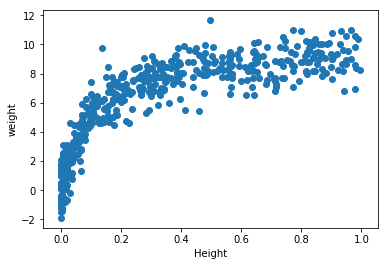

In [2]:
# Let's create our own dataset


def make_data(N, err = 1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N) 
        
    return X, y

X, y = make_data(500)

# print(x.shape)
plt.scatter(X, y)
plt.xlabel('Height')
plt.ylabel('weight')
plt.show() # We got our data

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree = 2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [4]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv = 7)
# print(val_score)

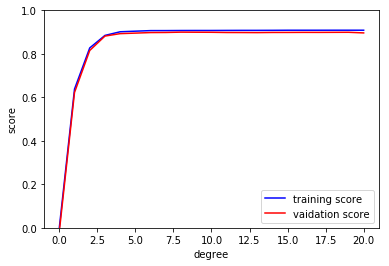

In [5]:
plt.plot(degree, np.median(train_score, axis = 1), color = 'b', label = 'training score')
plt.plot(degree, np.median(val_score, axis = 1), color = 'r', label = 'vaidation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

Here we can observe that degree 5 or 6 seems to be a resonable fit to the data points where as 20 degree polynomial is still not overfitting the data!

So here we can observe that the behaviour of validation curve has not one but two important parameters - 
1. The model complexity 
2. Number of training points

A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this - 
1. A model of a given complexity will overfit a small dataset, this means the trainig score will be relativly high and validation score will be very low.
2. A model of a given complexity will underfit a large dataset, this means both the training score and test score will be less. 
3. A model will never except by chance, give a better score to the validation set than the train set. This means the curves should keep getting closer together but will never cross. 

Check <b>sklearn.learning_curve import learning_curve</b> for more information.

In Practice, models generally have more than one knob to turn and thus plots of validation and learning curves change from lines to multidimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score. Scikit-learn provides automated tools to do this in grid_search module. Below is an example of using grid search to find the optimal Polynomil model. 

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept':[True, False],
    'linearregression__normalize': [True, False]
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)
# Note this has not been applied to any data

grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
# Now we can ask for best parameters

grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 6}

In [8]:
model = grid.best_estimator_

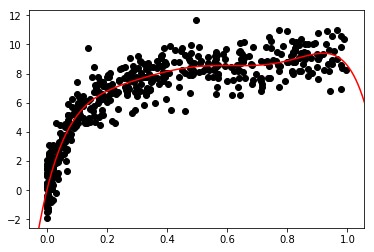

In [9]:
# Let's see the plot

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color = 'k')
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, color = 'r')
plt.axis(lim)
plt.show()

The gird search provides many more options, including the ability to specify a custom scoring function, to parallelize the computaitons, to do randomized and more. Check scikit learn for more information. 